In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
from data_loader import PybulletNpyDataset

In [3]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.models import resnet18, resnet34, resnet50

In [65]:
resnet = resnet18
model_path = 'data/classification/noft_29.pth' #'finetune_29.pth' #'noft_29.pth' #'model_29.pth'
data_path = '/ssd/disk/ur5_tidying_data/pybullet_line/test'
device = "cuda:0"

dataset = PybulletNpyDataset(data_dir=data_path)
dataset.fsize = 200
dataloader = DataLoader(dataset, batch_size=16, shuffle=False, num_workers=1)

model = resnet(pretrained=False)
fc_in_features = model.fc.in_features

model.fc = nn.Sequential(
    nn.Linear(fc_in_features, 1),
    nn.Sigmoid()
)
model.load_state_dict(torch.load(model_path))
model.to(device)
model.eval()

preprocess = transforms.Compose([
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

Score > 0.8


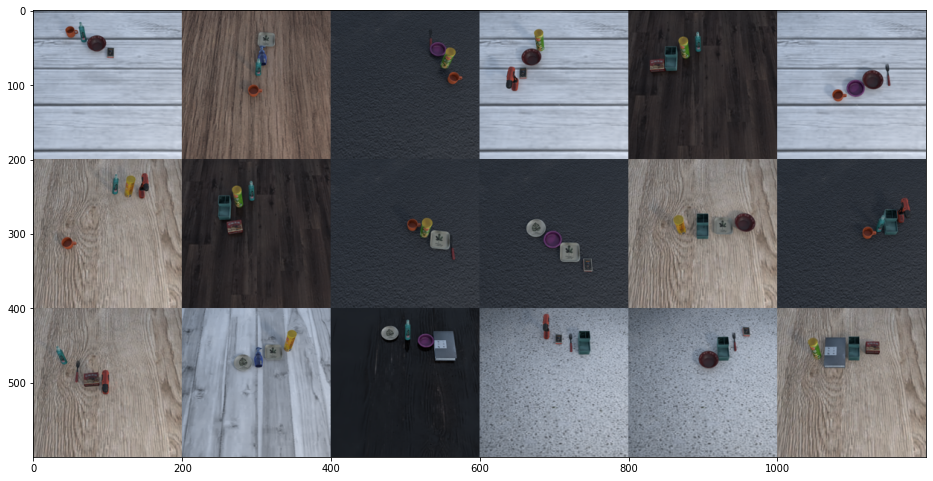

Score < 0.3


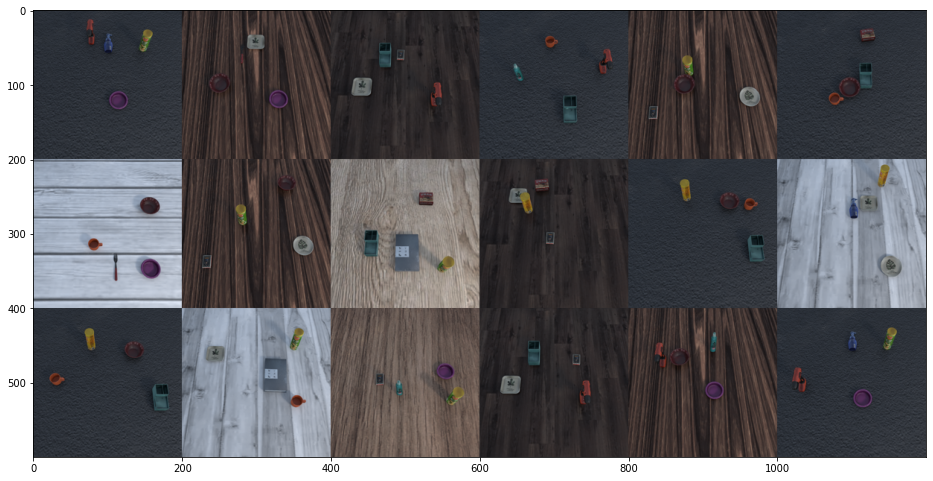

In [85]:
scene_over_08 = []
scene_under_03 = []

dataloader = DataLoader(dataset, batch_size=16, shuffle=True, num_workers=1)

count = 0
for X_val, Y_val in dataloader:
    x_raw = X_val.cpu().numpy().transpose([0, 2, 3, 1])
    X_val = preprocess(X_val).to(device)
    Y_val = Y_val[:, 0].to(device)
    y_pred = model(X_val)[:, 0].detach().cpu().numpy()
    
    scene_over_08.append(x_raw[y_pred>0.8])
    scene_under_03.append(x_raw[y_pred<0.3])
    count += 1
    
scene_over_08 = np.concatenate(scene_over_08, axis=0)
scene_under_03 = np.concatenate(scene_under_03, axis=0)

print("Score > 0.8")
scene_vstack = []
fig = plt.figure(figsize=(16, 9))
for i in range(3):
    scene_hstack = np.concatenate(scene_over_08[i*6: i*6+6], axis=1)
    scene_vstack.append(scene_hstack)
scene_patches = np.concatenate(scene_vstack, axis=0)
plt.imshow(scene_patches)
plt.show()

print("Score < 0.3")
scene_vstack = []
fig = plt.figure(figsize=(16, 9))
for i in range(3):
    scene_hstack = np.concatenate(scene_under_03[i*6: i*6+6], axis=1)
    scene_vstack.append(scene_hstack)
scene_patches = np.concatenate(scene_vstack, axis=0)
plt.imshow(scene_patches)
plt.show()

Score: 0.2670647


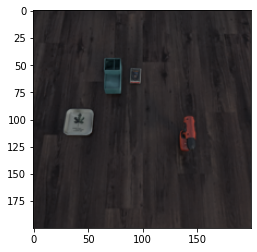

Score: 0.47046688


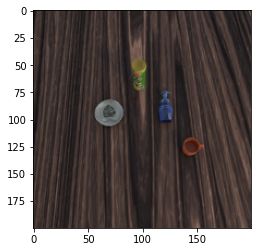

Score: 0.9997166


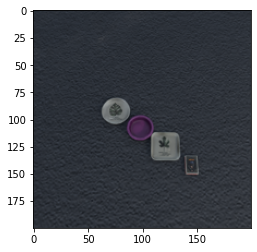

Score: 0.42345536


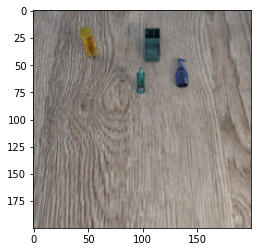

Score: 0.0052788467


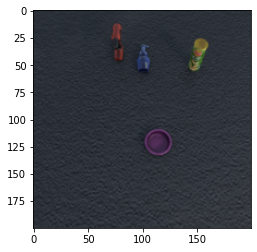

Score: 0.7255094


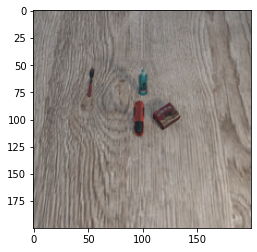

Score: 0.61206347


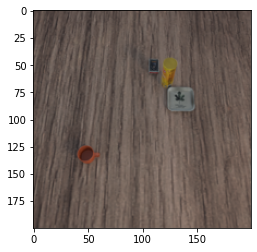

Score: 0.9542561


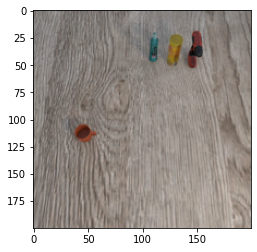

Score: 0.43199405


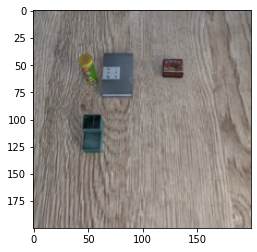

Score: 0.44911924


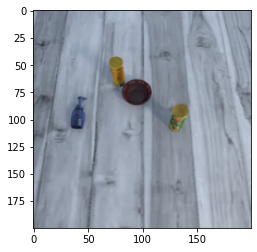

Score: 0.39616352


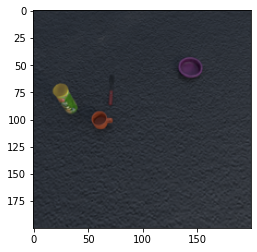

Score: 0.003943844


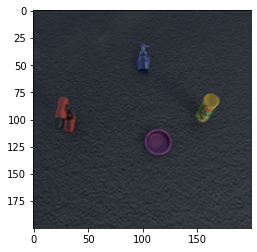

Score: 0.31689262


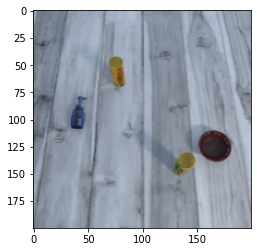

Score: 0.18413118


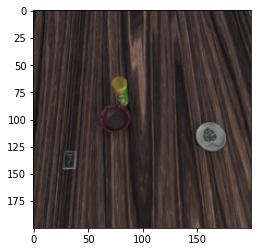

Score: 0.9858316


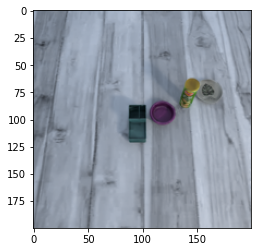

Score: 0.42801073


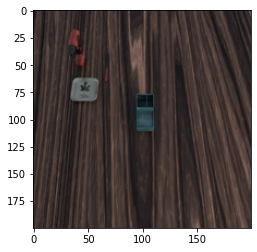

Score: 0.57782173


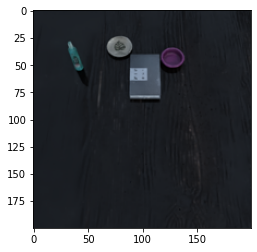

Score: 0.73927414


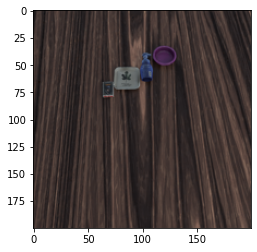

Score: 0.42733693


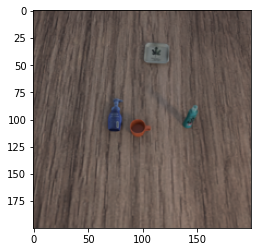

Score: 0.015599038


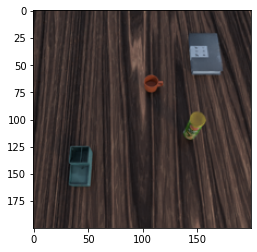

Score: 0.915906


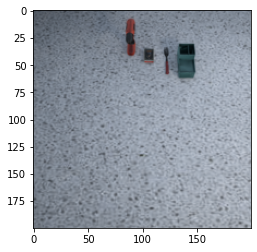

Score: 0.7638375


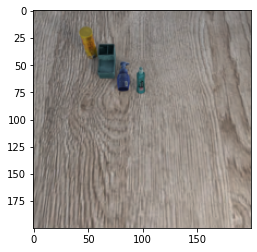

Score: 0.9875165


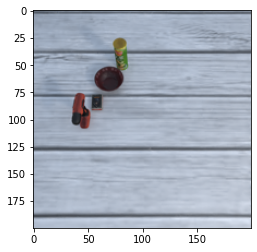

Score: 0.09397739


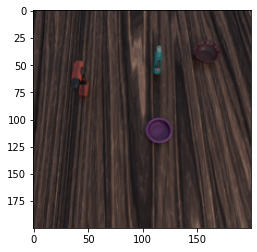

Score: 0.36675563


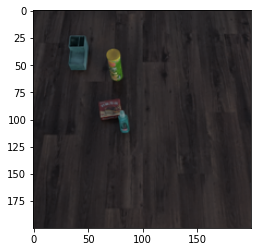

Score: 0.05144916


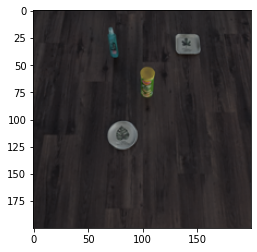

Score: 0.5419111


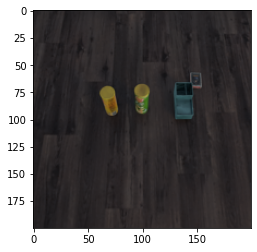

Score: 0.79876494


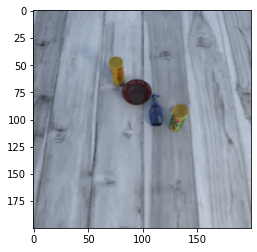

Score: 0.2492754


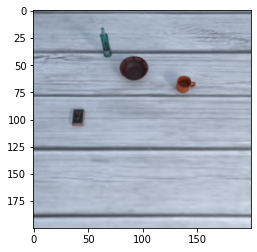

Score: 0.9467213


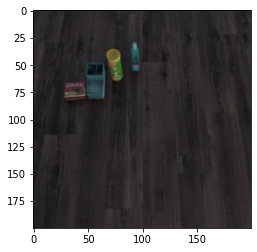

Score: 0.28276017


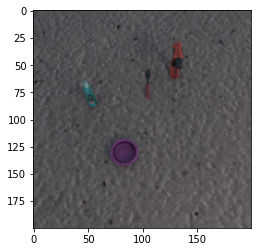

Score: 0.075439304


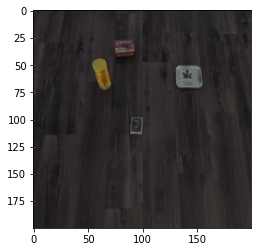

Score: 0.42001632


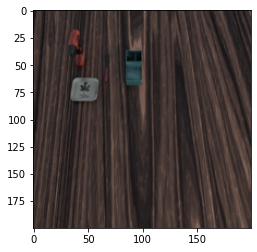

Score: 0.43081832


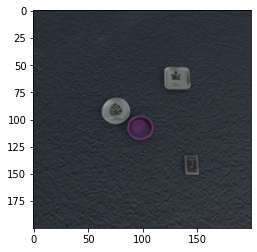

Score: 0.75910777


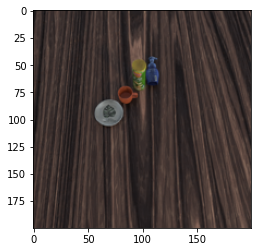

Score: 0.82088715


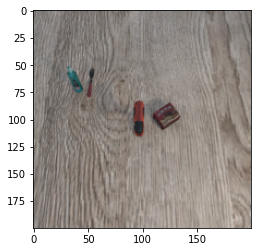

Score: 0.20079416


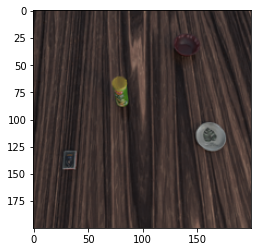

Score: 0.21028362


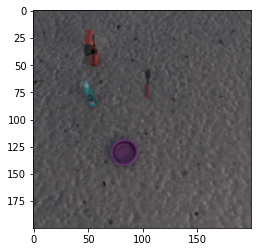

Score: 0.12996584


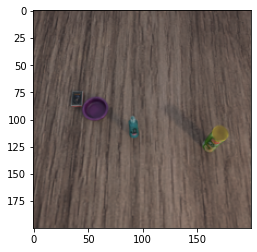

Score: 0.5117387


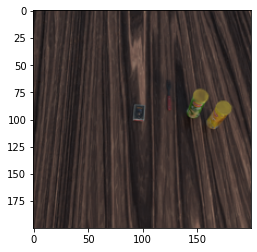

Score: 0.96503454


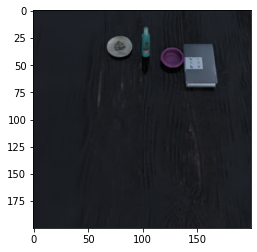

Score: 0.81383663


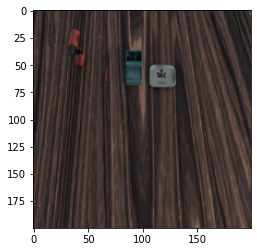

Score: 0.25770795


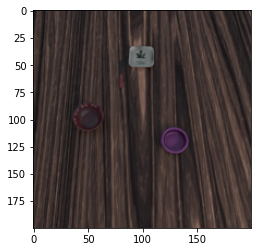

Score: 0.7571657


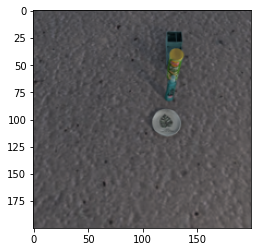

Score: 0.80783826


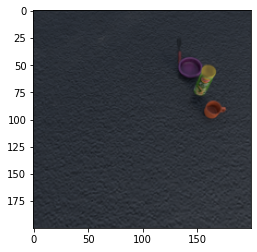

Score: 0.043260753


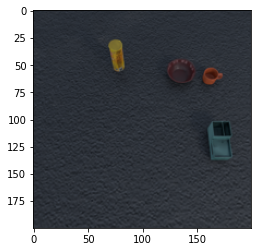

Score: 0.896008


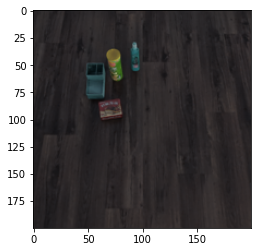

Score: 0.7914681


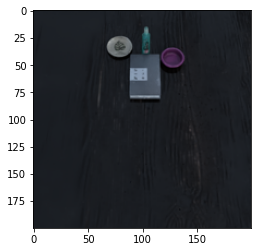

In [67]:
count = 0
for X_val, Y_val in dataloader:
    x_raw = X_val.cpu().numpy().transpose([0, 2, 3, 1])
    X_val = preprocess(X_val).to(device)
    Y_val = Y_val[:, 0].to(device)
    y_pred = model(X_val)[:, 0].detach().cpu().numpy()
    
    for i in range(12):
        print("Score:", y_pred[i])
        plt.imshow(x_raw[i])
        plt.show()
    count += 1
    if count > 3:
        break